In [1]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.applications import vgg16
from tensorflow.keras.optimizers import Adam, SGD
import scipy  #Used to upsample our image
import tensorflow

import os
import cv2
from PIL import Image
import numpy as np



np.random.seed(43)
tensorflow.random.set_seed(43)

#Read images and get them ready for training

path = r'C:\Users\user\OneDrive\Desktop\data\MURA-v1.1\train'
SIZE = 224


import os

def load_path(path):

    dataset = [] 
    for body in os.listdir(path):
        body_part = body
        if body_part in ['XR_HUMERUS', 'XR_WRIST', 'XR_ELBOW']:  # Only include specific body parts
            path_p = os.path.join(path, body_part)
            for id_p in os.listdir(path_p):
                patient_id = id_p
                path_id = os.path.join(path_p, id_p)
                for lab in os.listdir(path_id):
                    if lab.split('_')[-1] == 'positive': 
                        label = 1 
                    elif lab.split('_')[-1] == 'negative':
                        label = 0
                    path_l = os.path.join(path_id, lab)
                    for img in os.listdir(path_l):  
                        img_path = os.path.join(path_l, img)
                        dataset.append(
                            {
                                'body_part': body_part,
                                'patient_id': patient_id,
                                'label': label,
                                'img_path': img_path
                            }
                        )
    return dataset


In [3]:
path = r'C:\Users\user\OneDrive\Desktop\data\MURA-v1.1\train'
os.listdir(path)

['XR_ELBOW',
 'XR_FINGER',
 'XR_FOREARM',
 'XR_HAND',
 'XR_HUMERUS',
 'XR_SHOULDER',
 'XR_WRIST']

In [6]:

import pandas as pd 
dataset = load_path(path)
df_train = pd.DataFrame(dataset)
df_train.head()

,body_part,patient_id,label,img_path
0,XR_ELBOW,patient00011,0,C:\Users\user\OneDrive\Desktop\data\MURA-v1.1\...
1,XR_ELBOW,patient00011,0,C:\Users\user\OneDrive\Desktop\data\MURA-v1.1\...
2,XR_ELBOW,patient00011,0,C:\Users\user\OneDrive\Desktop\data\MURA-v1.1\...
3,XR_ELBOW,patient00016,1,C:\Users\user\OneDrive\Desktop\data\MURA-v1.1\...
4,XR_ELBOW,patient00016,1,C:\Users\user\OneDrive\Desktop\data\MURA-v1.1\...


In [8]:
dataset_test = load_path(path = r'C:\Users\user\OneDrive\Desktop\data\MURA-v1.1\valid')
df_test = pd.DataFrame(dataset_test)
df_test.head()

,body_part,patient_id,label,img_path
0,XR_ELBOW,patient11186,1,C:\Users\user\OneDrive\Desktop\data\MURA-v1.1\...
1,XR_ELBOW,patient11186,1,C:\Users\user\OneDrive\Desktop\data\MURA-v1.1\...
2,XR_ELBOW,patient11186,1,C:\Users\user\OneDrive\Desktop\data\MURA-v1.1\...
3,XR_ELBOW,patient11186,1,C:\Users\user\OneDrive\Desktop\data\MURA-v1.1\...
4,XR_ELBOW,patient11186,1,C:\Users\user\OneDrive\Desktop\data\MURA-v1.1\...


In [10]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.applications import vgg16
from tensorflow.keras.optimizers import Adam, SGD
import scipy  #Used to upsample our image

import os
import cv2
from PIL import Image
import numpy as np




#Read images and get them ready for training

path = r'C:\Users\user\OneDrive\Desktop\data\MURA-v1.1\train'
SIZE = 224

import os
dataset = [] 

images_array=[]
anomaly = []



# Initialize counters
images_per_category = 1000
image_counter = {part: 0 for part in ['XR_HUMERUS', 'XR_WRIST', 'XR_ELBOW']}


for body in os.listdir(r"C:\Users\user\OneDrive\Desktop\data\MURA-v1.1\train"):
    body_part = body
    if body_part in ['XR_HUMERUS', 'XR_WRIST', 'XR_ELBOW']:  # Only include specific body parts
        path_p = os.path.join(path, body_part)
        count = 0  # Counter to keep track of images per category
        for id_p in os.listdir(path_p):
            if count >= images_per_category:  
                break
            patient_id = id_p
            path_id = os.path.join(path_p, id_p)
            for lab in os.listdir(path_id):
                labb = lab
                if count >= images_per_category:  
                    break
                if lab.split('_')[-1] == 'positive':
                    label = 1
                elif lab.split('_')[-1] == 'negative':
                    label = 0
                path_l = os.path.join(path_id, labb)
                for img in os.listdir(path_l):
                    if count >=images_per_category:
                        break
                    img_path = os.path.join(path_l, img)
                    image = cv2.imread(img_path)
                    if image is None:
                        print(f"Failed to read image: {img_path}")
                    else:
                        image = Image.fromarray(image, 'RGB')
                        image = image.resize((SIZE, SIZE))
                        images_array.append(np.array(image))
                        anomaly.append(label)
                        count += 1  


In [12]:
print("Length of images_array:", len(images_array))
print("Length of anomaly (labels):", len(anomaly))

Length of images_array: 3000
Length of anomaly (labels): 3000


In [13]:
anomaly

[0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [14]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.applications import vgg16
from tensorflow.keras.optimizers import Adam, SGD
import scipy  #Used to upsample our image
import os
import cv2
from PIL import Image
import numpy as np



images_array = np.array(images_array)
anomaly = np.array(anomaly)

#Split into train and test data sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images_array, anomaly, test_size = 0.20, random_state = 0)

#Without scaling (normalize) the training may not converge. 
#so that all values are within the range of 0 and 1.

X_train = X_train /255.
X_test = X_test /255.

#Let us setup the model as multiclass with total classes as 2.
#This way the model can be used for other multiclass examples. 
#Since we will be using categorical cross entropy loss, we need to convert our Y values to categorical. 
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [15]:
X_train.shape

(2400, 224, 224, 3)

In [16]:
X_test.shape

(600, 224, 224, 3)

In [18]:
y_train.shape

(2400, 2)

In [19]:
y_test.shape

(600, 2)

In [21]:

def get_model(input_shape = (224,224,3)):
    
    vgg = vgg16.VGG16(weights='imagenet', include_top=False, input_shape = input_shape)

    
    for layer in vgg.layers[:-5]:   
        print(layer.name)
        layer.trainable = False 

    x = vgg.output
    x = GlobalAveragePooling2D()(x) 
    x = Dense(2, activation="softmax")(x)  

    model = Model(vgg.input, x)

    model.compile(loss="categorical_crossentropy", 
              optimizer=Adam(learning_rate=0.0001), metrics=["accuracy"])
    
    return model

model = get_model(input_shape = (224,224,3))
print(model.summary())

history = model.fit(X_train, y_train, batch_size=100, epochs=20, verbose = 1, 
                    validation_data=(X_test,y_test))

58889256/58889256 [==============================] - 794s 13us/step
input_2
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                 

In [22]:
# Save the model
model.save('model_anomaly.h5')

# Save the training history
import pickle

with open('model_anomaly_training_history.pkl', 'wb') as file:
    pickle.dump(history.history, file)

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


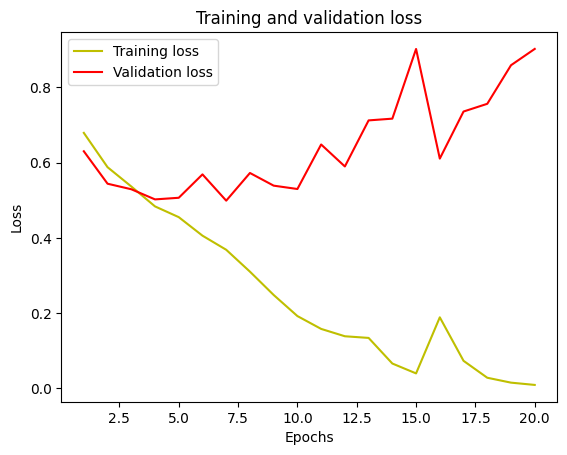

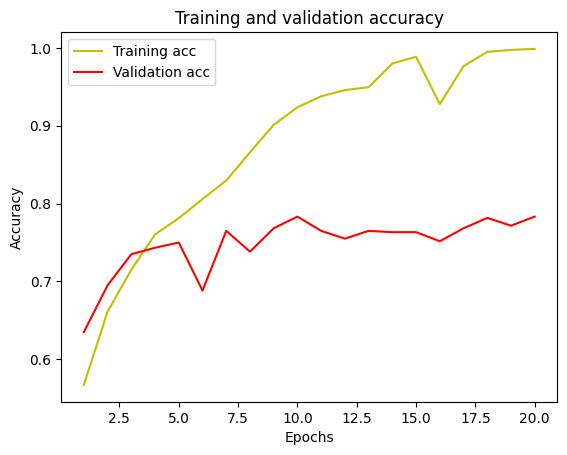

19/19 [==============================] - 72s 4s/step - loss: 0.9020 - accuracy: 0.7833
Accuracy =  78.33333611488342 %


In [23]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

###############################################################

#Check model accuracy on the test data
_, acc = model.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")

19/19 [==============================] - 68s 4s/step


<Axes: >

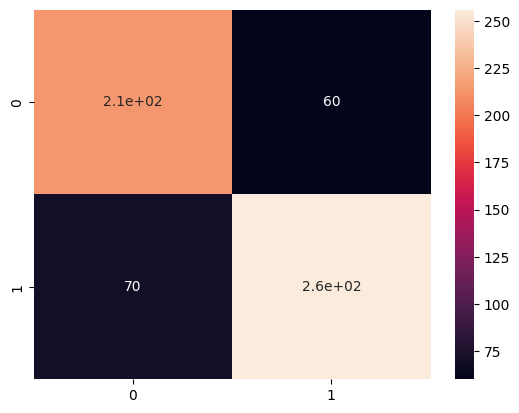

In [24]:
#Print confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = np.argmax(model.predict(X_test), axis=1)
cm=confusion_matrix(np.argmax(y_test, axis=1), y_pred)  
sns.heatmap(cm, annot=True)
